# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [311]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [312]:
df = pd.read_csv('heights.csv')

In [313]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


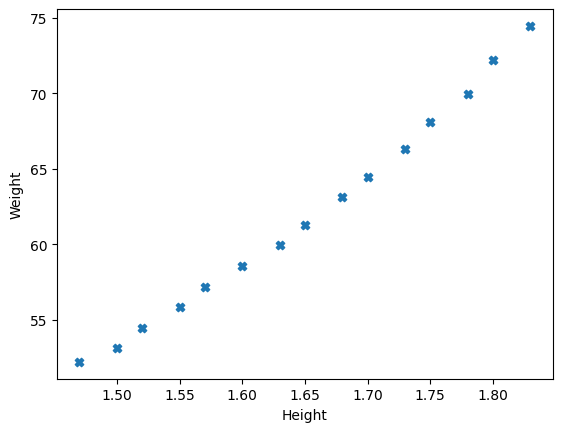

In [314]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [315]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [316]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range (self.epochs):
          self.update_weights(X,y)
    def update_weights(self, X, y):
            n_samples=X.shape[0]
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred




### Build the model and train on the dataset.

In [317]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)


### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [318]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """

    squared_errors = (y_pred - y_actual) ** 2


    mse = np.mean(squared_errors)

    return mse


### Make predictions using the model and evaluate it.

In [319]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.5197


### Plot the predicted and the actual values.

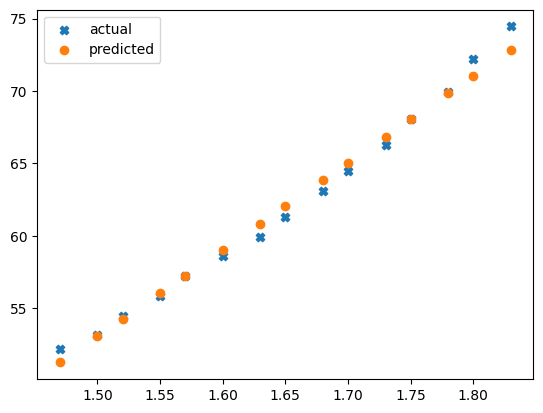

In [320]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [321]:
df = pd.read_csv('./advertise.csv')

In [322]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [323]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [324]:
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

In [325]:
######################
#   YOUR CODE HERE   #
######################
dataset = df.values.tolist()

minmax = dataset_minmax(dataset)
normalized_data = normalize_dataset([row[:] for row in dataset], minmax)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

X = normalized_df.drop(columns='Sales').values
y = normalized_df['Sales'].values


### Split the data into train and test set.

In [326]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [327]:
test_frac = 0.2
rand_seed = 42

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [328]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [329]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [330]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 0.0041
Test MSE: 0.0045


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


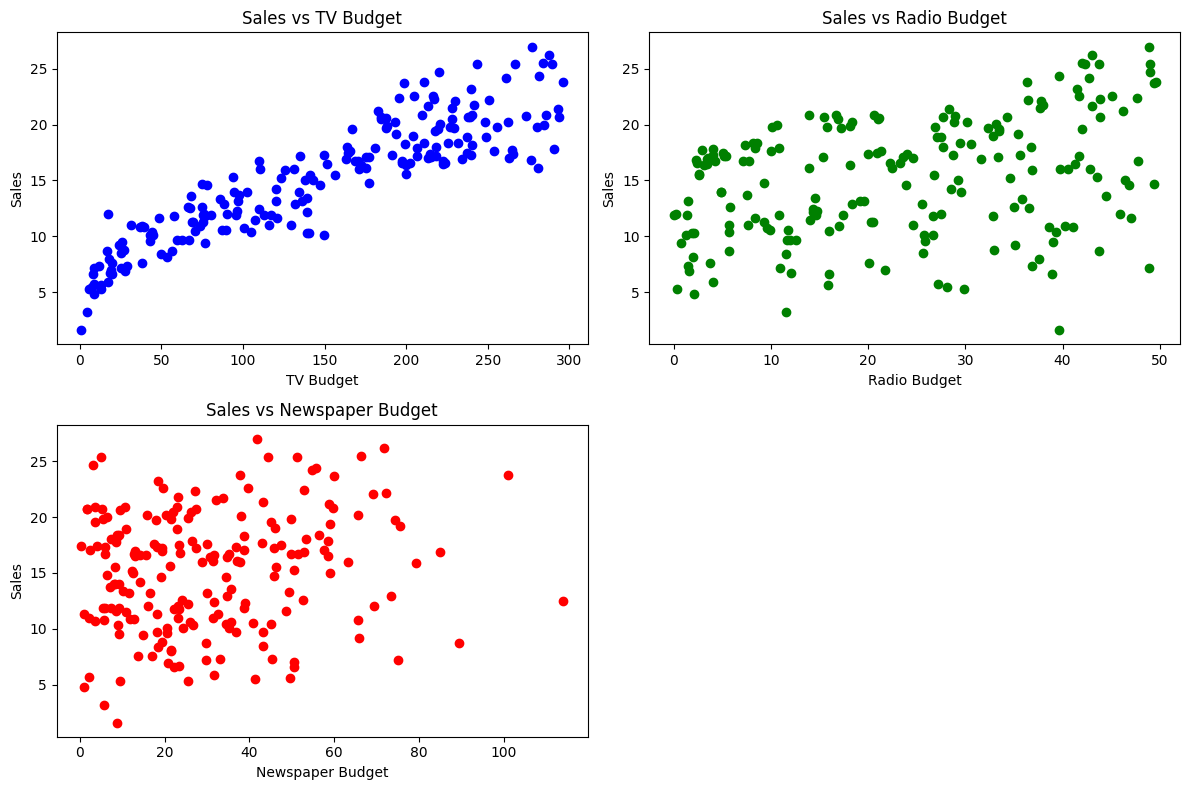

Learned parameters (Closed Form Solution): [0.73151346 0.27839982 0.08399501]
Mean Squared Error (Closed Form Solution): 0.0063339520976540345


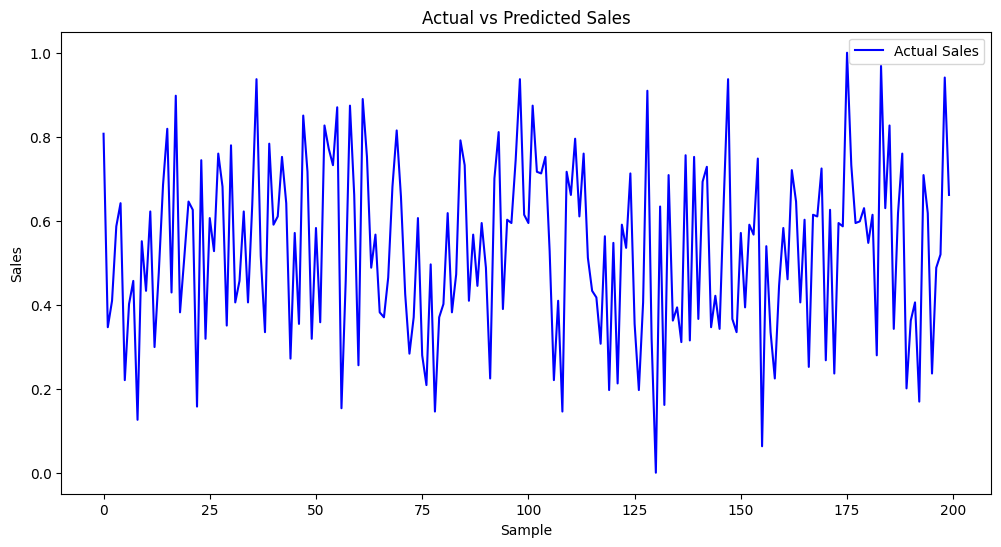

In [331]:
###########################
### Write your code here###
###########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('advertise.csv')


print(data.head())

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(data['TV'], data['Sales'], c='blue')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.title('Sales vs TV Budget')

plt.subplot(2, 2, 2)
plt.scatter(data['Radio'], data['Sales'], c='green')
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.title('Sales vs Radio Budget')

plt.subplot(2, 2, 3)
plt.scatter(data['Newspaper'], data['Sales'], c='red')
plt.xlabel('Newspaper Budget')
plt.ylabel('Sales')
plt.title('Sales vs Newspaper Budget')

plt.tight_layout()
plt.show()

class LinearRegressionCF:
    def fit(self, X, y):
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        return X.dot(self.theta)

model_cf = LinearRegressionCF()
model_cf.fit(X, y)


print("Learned parameters (Closed Form Solution):", model_cf.theta)


y_pred_cf = model_cf.predict(X)
mse_cf = np.mean((y_pred_cf - y) ** 2)

print(f'Mean Squared Error (Closed Form Solution): {mse_cf}')


plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Sales', color='blue')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [332]:
df = pd.read_csv('/content/heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [333]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [334]:
def sigmoid(z):
      return 1.0/(1.0+np.exp(-z))

class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields




    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range (self.n_iters):
          self.update_weights(X,y)
    def update_weights(self, X, y):
            n_samples=X.shape[0]
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
    def predict_proba(self, X):

      linear_pred = np.dot(X, self.weights) + self.bias
      y_pred = sigmoid(linear_pred)
      return y_pred

    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        probabilities = self.predict_proba(X)
        class_pred = (probabilities >= 0.5).astype(float)
        return class_pred
        ######################
        #   YOUR CODE HERE   #
        ######################



### Build the model and train on the dataset.

In [335]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [336]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    correct_predictions = np.sum(y_pred == y_actual)
    total_predictions = len(y_actual)
    return correct_predictions / total_predictions



### Make predictions using the model and evaluate it.

In [337]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 0.6666666666666666


### Plot the predicted and the actual values.

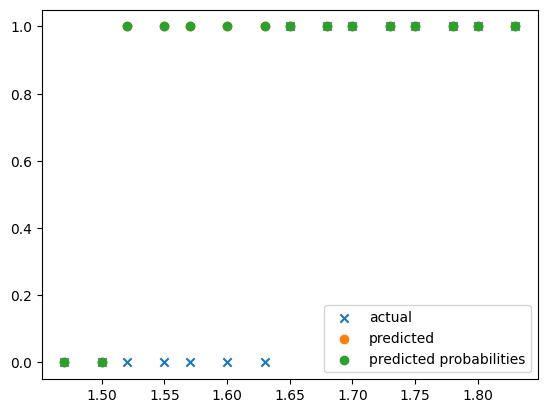

In [338]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# ** Use the Newton Raphson Method for the same** (75 marks)


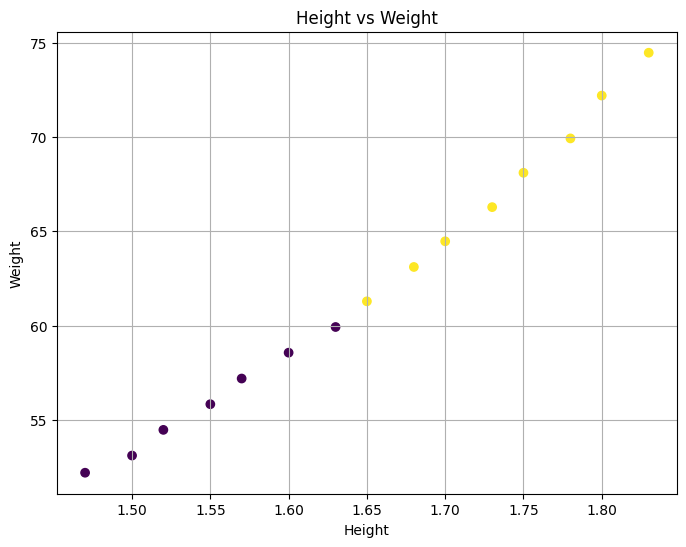

In [346]:
#####################
#   YOUR CODE HERE   #
######################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heights.csv')

# Divide weights into two categories: 0 if weight < 60, 1 otherwise
data['Category'] = (data['Weight'] >= 60).astype(int)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(data['Height'], data['Weight'], c=data['Category'], cmap='viridis')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.grid(True)
plt.show()



In [340]:
class LogisticRegression:
    def __init__(self, tol=1e-5, max_iter=100):
        self.tol = tol
        self.max_iter = max_iter
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        for _ in range(self.max_iter):
            z = X.dot(self.theta)
            h = self.sigmoid(z)
            gradient = (1/m) * X.T.dot(h - y)
            H = (1/m) * X.T.dot(np.diag(h * (1 - h))).dot(X)
            delta = np.linalg.inv(H).dot(gradient)
            self.theta -= delta

            if np.linalg.norm(delta, 1) < self.tol:
                break

    def predict_proba(self, X):
        return self.sigmoid(X.dot(self.theta))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


In [347]:
X = data[['Height']].values
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term
y = data['Category'].values

# Train the logistic regression model
model = LogisticRegression(max_iter=100, tol=1e-5)
model.fit(X, y)

# Print the learned parameters
print("Learned parameters:", model.theta)

# Make predictions
y_pred = model.predict(X)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(data['Height'], data['Weight'], c=data['Category'], cmap='viridis', label='Actual')
plt.scatter(data['Height'], data['Weight'], c=y_pred, cmap='coolwarm', marker='x', label='Predicted')

# Decision boundary
x_values = np.linspace(data['Height'].min(), data['Height'].max(), 100)
y_values = -(model.theta[0] + model.theta[1] * x_values) / model.theta[1]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

LinAlgError: Singular matrix

# K Means Clustering(100 marks)



In [342]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



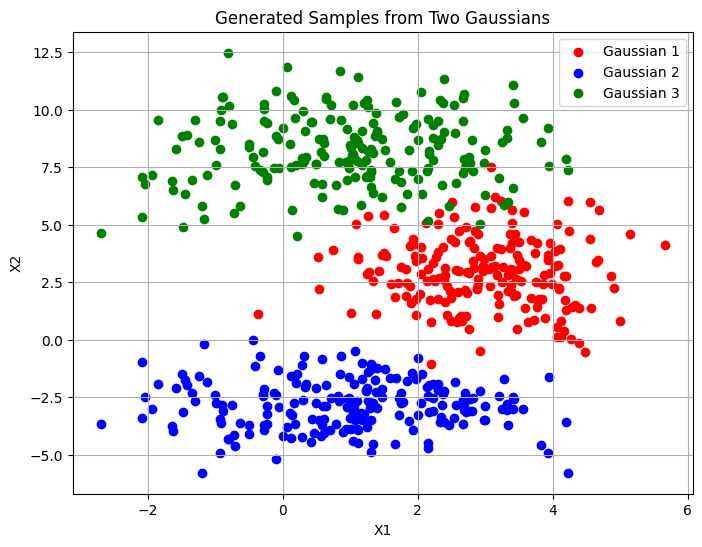

In [349]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

### The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

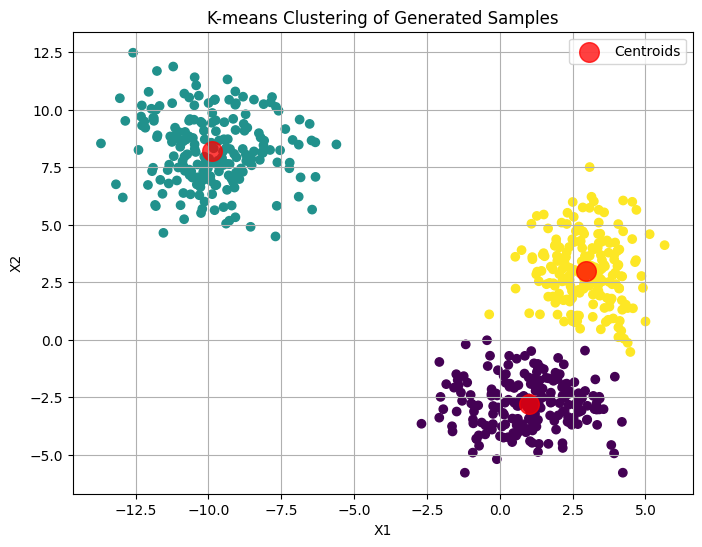

In [352]:
data = np.vstack((samples1, samples2, samples3))

def kmeans(data, k, epochs=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(epochs):
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

k = 3
labels, centroids = kmeans(data, k)
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering of Generated Samples')
plt.legend()
plt.grid(True)
plt.show()